## Zomato_Data_Analysis_Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("Zomato_data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
# change data type
def handle_rate(value):
    value=str(value).split('/')  # Splitting the value at '/'=["4.1", "5"]
    value=value[0]       # Taking the first part = "4.1"
    return float(value)  # Converting it to a float
df['rate']=df['rate'].apply(handle_rate)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

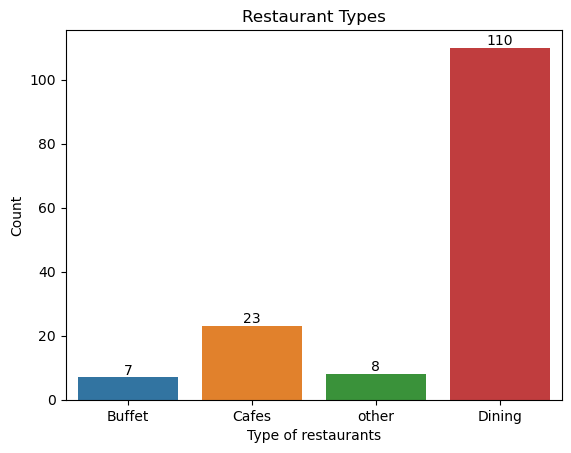

In [74]:
# Count of Restaurant Types
ax = sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurants")
plt.ylabel("Count")
plt.title("Restaurant Types")

# Adding values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()


Majority of the restaurants falls in dining category

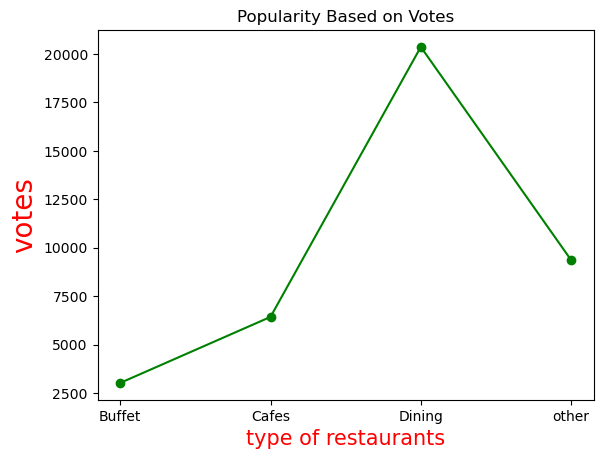

In [42]:
# Popularity Based on Votes
grouped_data=df.groupby(['listed_in(type)'])['votes'].sum()
plt.plot(grouped_data,c="green",marker='o')
plt.title("Popularity Based on Votes")
plt.xlabel("type of restaurants",c='red',size=15)
plt.ylabel("votes",c='red',size=20)
plt.show()

Dining restaurants has received more votes

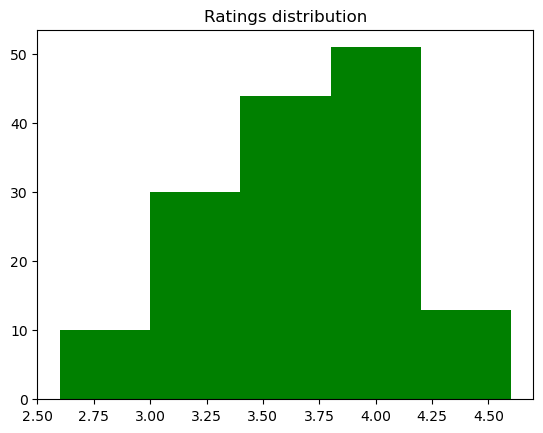

In [14]:
# Ratings Distribution
plt.hist(df['rate'],bins=5,color='g')
plt.title("Ratings distribution")
plt.show()


Majority restaurants received ratings from 3.5 to 4


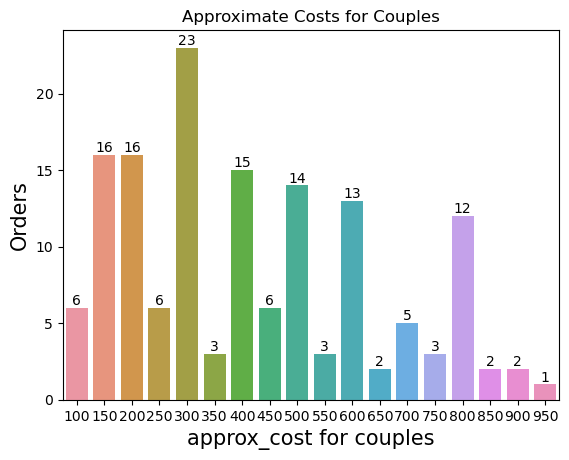

In [16]:
# Cost Distribution for Couples
ax = sns.countplot(x=df['approx_cost(for two people)'])
plt.title("Approximate Costs for Couples") 
plt.xlabel("approx_cost for couples", size=15)
plt.ylabel("Orders", size=15)

# Adding values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.show()


The majority of couples preferred restaurants with an approximate cost of 300 rupees

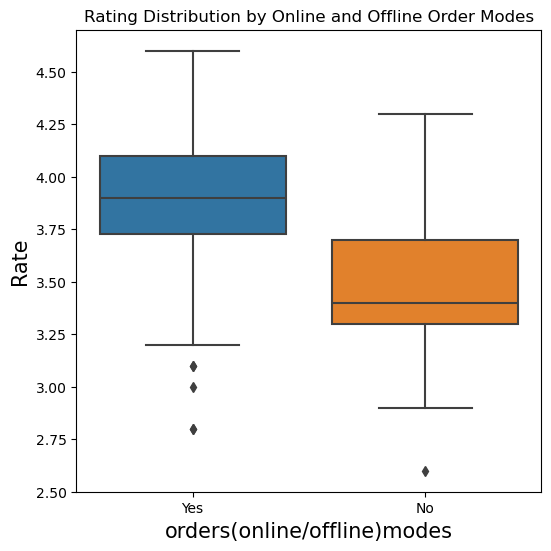

In [68]:
# Online vs Offline Orders - Rating Comparison
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order' ,y= 'rate' ,data=df)
plt.title("Rating Distribution by Online and Offline Order Modes") 
plt.xlabel("orders(online/offline)modes",size=15)
plt.ylabel("Rate",size=15)
plt.show()

Offline orders recieved lower ratings campared to online orders

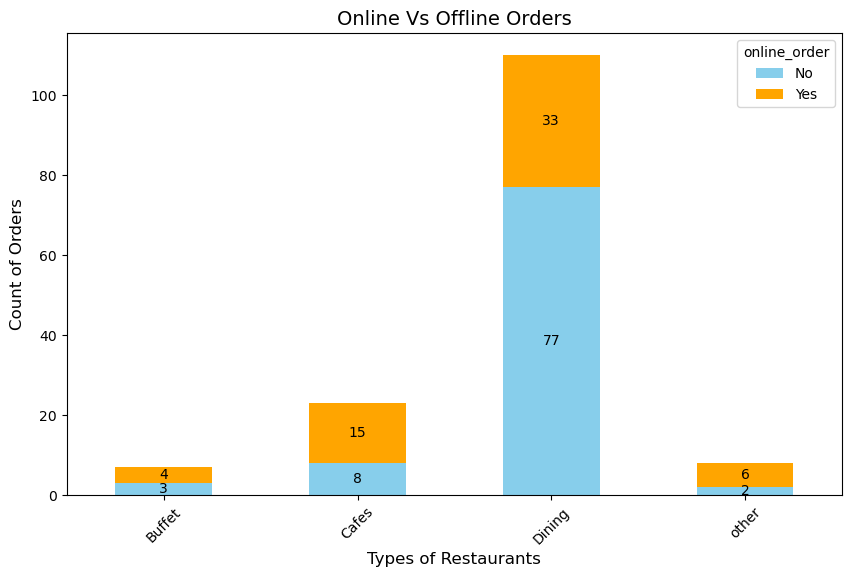

In [66]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])

plt.xlabel("Types of Restaurants", fontsize=12)
plt.ylabel("Count of Orders", fontsize=12)
plt.title("Online Vs Offline Orders", fontsize=14)
plt.xticks(rotation=45)

# Adding values to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.show()


### Conclusion 


#### -Most restaurants fall into the dining category.

#### -Dining restaurants receive higher votes than others.

#### -Most restaurants are rated between 3.5 to 4.

#### -Couples prefer budget-friendly restaurants (₹300 approx.).

#### -Online orders receive better ratings than offline orders.